In [2]:
# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [3]:
# MPC import
from LinearMPCOffsetFree.MPCVelControl import MPCVelControl

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [4]:
Ts = 0.05
sim_time = 15
H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# Static mass change and zero fuel rate
rocket.mass = 2.0
rocket.fuel_rate = 0.1
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(mpc, sim_time, H, x0, x_target=x_target, method='nonlinear')


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Maximum invariant set successfully computed after 6 iterations:
  Dimension: 3
Maximum invariant set successfully computed after 6 iterations:
  Dimension: 3
_setup_controller for z_vel
Maximum invariant set successfully computed after 44 iterations:
  Dimension: 2
Simulating time 0.00: Fuel left: 1.00 kg, 
Simulating time 0.05: Fuel left: 1.00 kg, 
Simulating time 0.10: Fuel left: 0.99 kg, 
Simulating time 0.15: Fuel left: 0.99 kg, 
Simulating time 0.20: 
 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.20 > 0.17, Fuel left: 0.99 kg, 
Simulating time 0.25: 
 State beta violation: -0.31 < -

In [5]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=ref[:,:-1], T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol); 

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

 JS Error => error: Uncaught SyntaxError: missing ) after argument list


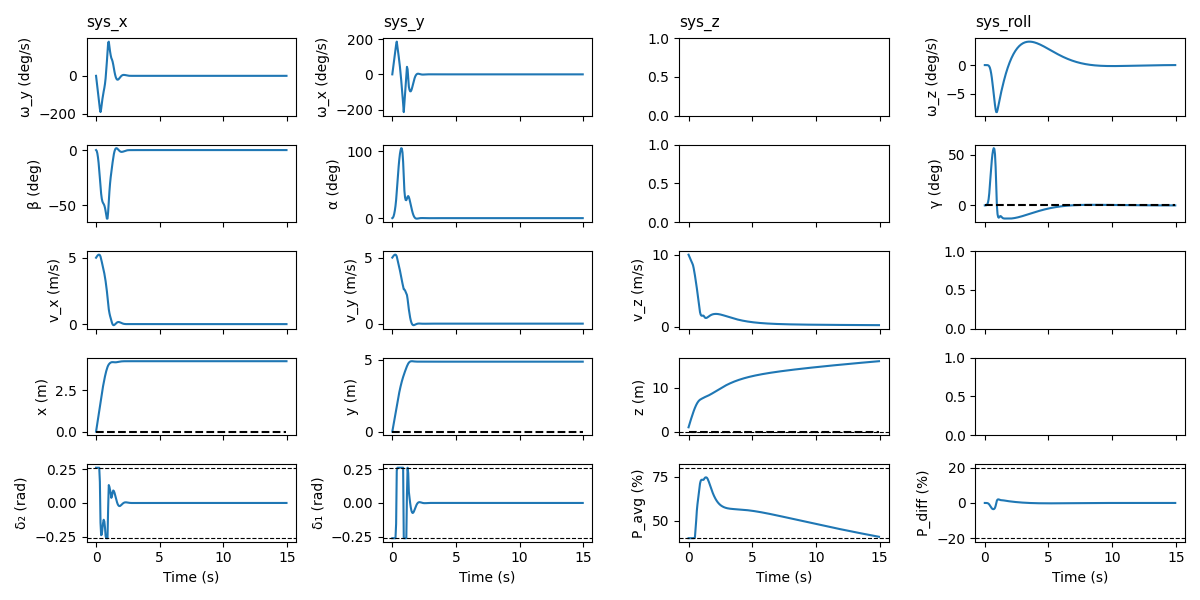

In [6]:
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, ref[:,:-1])